# 1. Работа с базой данных из Python

✍ Ранее в курсе мы познакомились с основами SQL (язык запросов к базам данных) и Python (язык программирования). Возможно, у вас возникал вопрос: можно ли объединить два этих механизма? Можно ли работать с базами данных и выполнять SQL-запросы средствами Python? И если можно, то как это сделать?

В курсе для удобства работы с данными мы использовали Metabase. Однако Metabase — это не сама база данных, а BI-инструмент, то есть удобный интерфейс для взаимодействия с данными, которые хранятся в БД, построения отчётов и графиков. Всё это время наши данные хранились под управлением СУБД PostgreSQL, а обращались мы к ним через запросы в Metabase.

https://proglib.io/p/chto-takoe-bi-sistemy-i-zachem-oni-nuzhny-2021-05-10

В реальной деятельности дата-сайентисту требуется не только писать запрос к данным, но и затем обрабатывать его результаты с помощью Python. Для решения таких задач требуется некоторое средство, которое будет связывать Python и PostgreSQL так, чтобы мы могли с помощью Python отправлять запросы в Postgres и принимать оттуда результаты.

Именно таким средством является пакет psycopg2, о котором мы сейчас и поговорим.

### Установка psycopg2

Установить данный пакет на любой платформе можно одним способом — с помощью pip.

Запустите в отдельной ячейке Jupyter Notebook следующий код:

In [ ]:
#!pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------------------ --- 1.0/1.2 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.4 MB/s eta 0:00:00


Если при установке возникает ошибка, похожая на “connection error: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:598)”, попробуйте установить пакет следующим образом:

In [ ]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org psycopg2

Если всё прошло успешно, вы увидите сообщение, подобное этому:

Collecting psycopg2

Downloading psycopg2-2.7.5

Installing collected packages: psycopg2

Successfully installed psycopg2-2.7.5

Цифры могут отличаться, так как пакеты развиваются и номер их версии увеличивается.

Теперь посмотрим, как можно подключиться к нашей базе и выполнять запросы из Jupyter-ноутбука.

Для подключения нам потребуются следующие данные:

- dbname — название базы, к которой нужно подключиться;
- user — имя пользователя в СУБД;
- password — пароль;
- host — адрес, по которому нужно подключиться;
- port — порт, к которому нужно подключиться (по умолчанию равен 5432).

Для нашей базы эти параметры такие:

- DBNAME = 'skillfactory'
- USER = 'skillfactory'
- PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
- HOST = '84.201.134.129'
- PORT = 5432

### Настройки

Начинаем с импорта библиотек:

In [6]:
import psycopg2
import pandas as pd

Создаём соединение с заданными параметрами:

In [13]:
DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432


In [14]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

Запрос:

In [ ]:
# код запроса представляет из себя строковую переменную
n = 10
query = f'''select *
           from sql.pokemon
           limit {n}
        '''
# лучше использовать f-строки — так удобнее передавать параметры

### Выполнение запроса

In [ ]:
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query, connection)
df

### Финал

In [ ]:
# не забываем закрыть соединение после окончания работы
connection.close()

# 2. Введение. Знакомство с данными

✍ Представьте, что вы устроились на работу в кадровое агентство, которое подбирает вакансии для IT-специалистов. Ваш первый проект — создание модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist. Сначала вам необходимо понять, что из себя представляют данные и насколько они соответствуют целям проекта. В литературе эта часть работы над ML-проектом называется Data Understanding, или анализ данных.

Наш проект включает в себя несколько этапов:
- знакомство с данными;
- предварительный анализ данных;
- детальный анализ вакансий;
- анализ работодателей;
- предметный анализ.

Каждая из частей будет состоять из блока практических заданий, которые вам необходимо выполнить в своих Jupyter-ноутбуках, и контрольных вопросов на платформе, которые проверяются автоматически.

Также вам предстоит отправить свой код ментору для код-ревью. Вам будет предоставлен ноутбук-шаблон и требования, согласно которым вы должны оформить своё решение.

Требования к оформлению ноутбука-решения:

- Решение оформляется только в Jupyter Notebook.
- Решение оформляется в соответствии с ноутбуком-шаблоном.
- Каждое задание выполняется в отдельной ячейке, выделенной под задание (в шаблоне они помечены как ваш код здесь). Не следует создавать много ячеек для решения задачи — это провоцирует неудобства при проверке.
- Текст SQL-запросов и код на Python должны быть читаемыми. Не забывайте про отступы в SQL-коде.
- Выводы по каждому этапу оформляются в формате Markdown в отдельной ячейке (в шаблоне они помечены как ваши выводы здесь).
- Выводы можно дополнительно проиллюстрировать с помощью графиков. Они оформляются в соответствии с теми правилами, которые мы приводили в модуле по визуализации данных.
- Не забудьте удалить ячейку с данными соединения перед фиксацией работы в GitHub.

### Знакомство с данными

Все необходимые таблицы находятся в схеме public базы данных project_sql (именно эту базу вам необходимо указать в параметре dbname при подключении).

То есть параметры подключения будут следующими:

In [ ]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

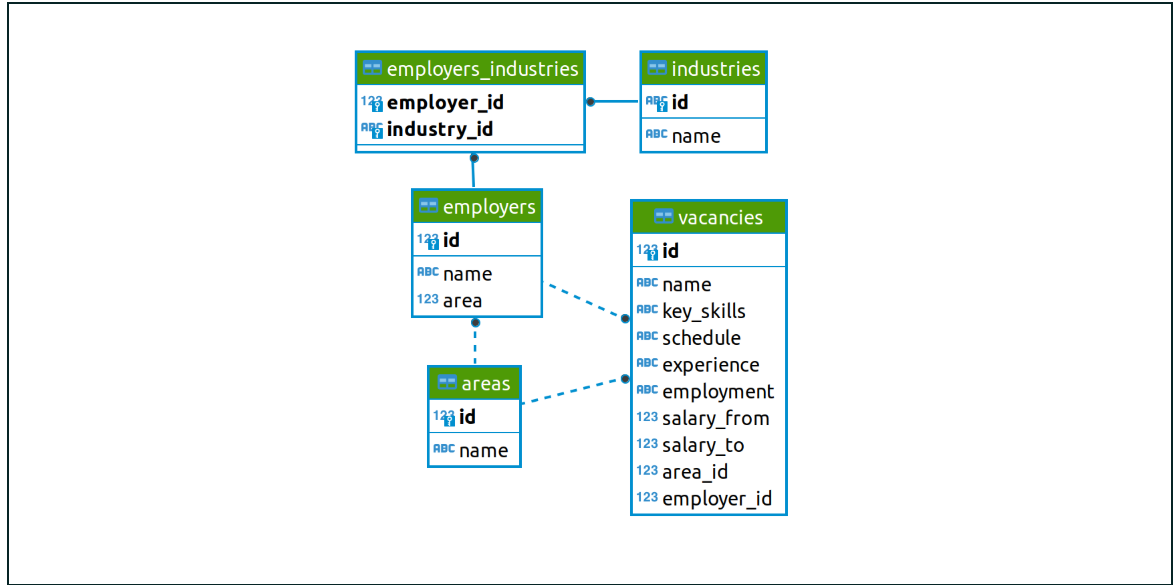

### vacancies

Таблица хранит в себе данные по вакансиям и содержит следующие столбцы:

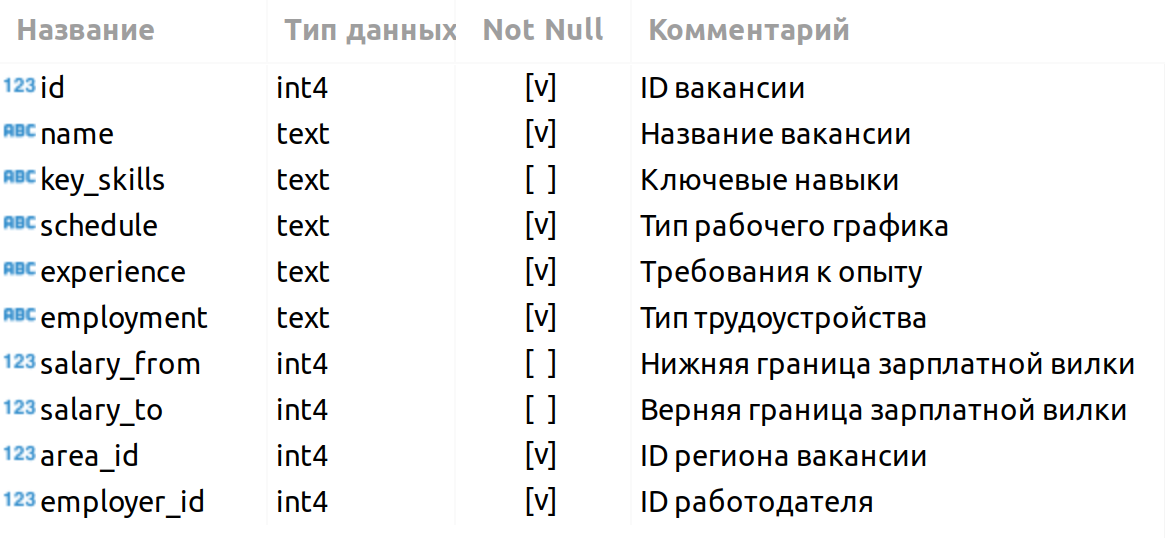

Зарплатная вилка — это верхняя и нижняя граница оплаты труда в рублях (зарплаты в других валютах уже переведены в рубли). Соискателям она показывает, в каком диапазоне компания готова платить сотруднику на этой должности.

### areas

Таблица-справочник, которая хранит код региона и его название.

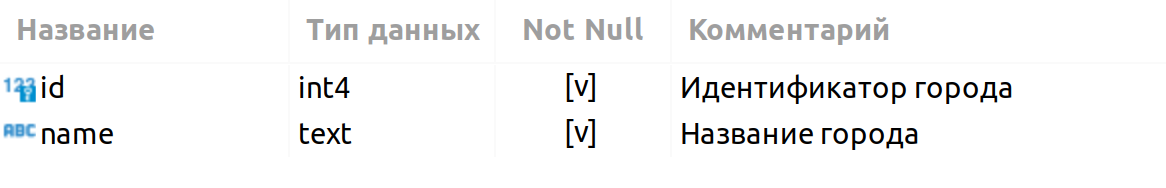

### employers

Таблица-справочник со списком работодателей.

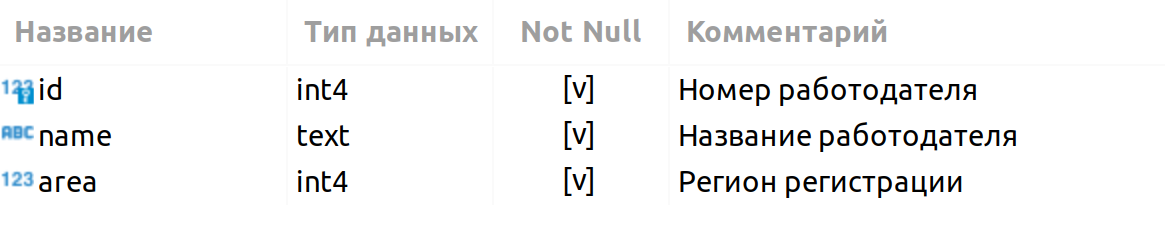

### industries

Таблица-справочник вариантов сфер деятельности работодателей.

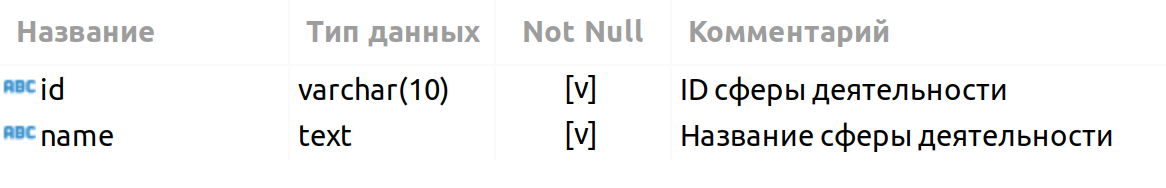

### employers_industries

Дополнительная таблица, которая существует для организации связи между работодателями и сферами их деятельности.

Эта таблица нужна нам, поскольку у одного работодателя может быть несколько сфер деятельности (или работодатели могут вовсе не указать их). Для удобства анализа необходимо хранить запись по каждой сфере каждого работодателя в отдельной строке таблицы.

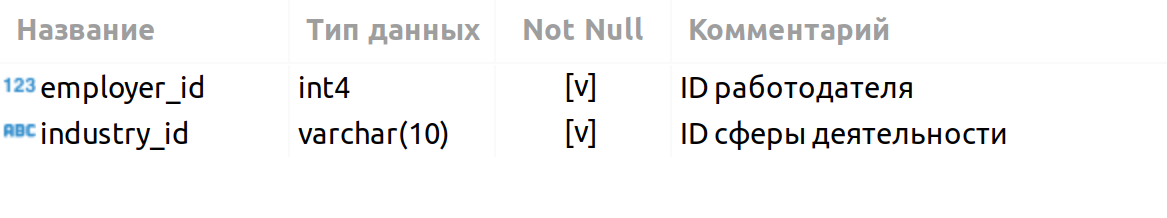